In [1]:
#!/usr/bin/env python
# coding: utf-8

import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

#Read file
df = pd.read_excel("J:\Studio De Voogt\Specialists & NA\Feadship Database\Feadship Python\IAN WORKSTUDENT 2024\LSW steel.xlsx")

In [2]:
df.head()

,Number,Yard,yard,Loa,LSW,Hull material,Hull_mat,Lavg,Depth,GT,LavBD,BOA,GT volume,Superstructure VOL
0,YN807 DN2722,"Royal van Lent, de Kaag",0,62.00,1024.902,Steel,1,58.25,6.20,1494.0,4262,12.20,5440.061652,1178.061652
1,YN674 DN2600,"Koninklijke de Vries, Aalsmeer",1,72.80,1092.455,Steel,1,72.80,6.25,1467.0,4960,11.40,5344.279773,384.279773
2,YN791 DN2489,"Royal van Lent, de Kaag",0,42.56,372.000,Steel,1,40.33,4.60,443.0,1595,9.20,1665.385693,70.385693
3,YN790 DN2498,"Royal van Lent, de Kaag",0,86.00,1288.000,Steel,1,81.50,6.60,2107.0,6186,11.90,7597.795293,1411.795293
4,YN789 DN2499,"Royal van Lent, de Kaag",0,46.50,484.000,Steel,1,43.83,4.90,562.0,1900,9.25,2097.544308,197.544308


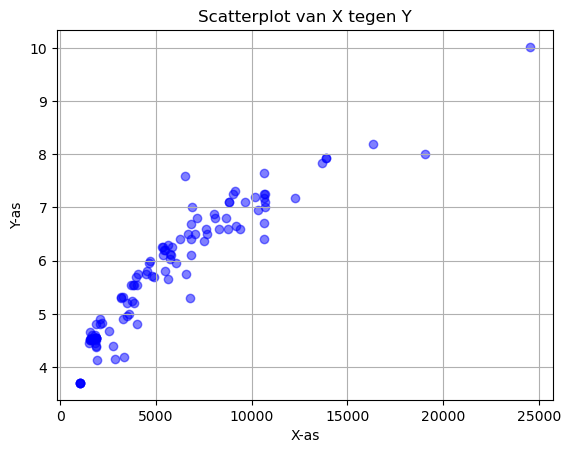

In [18]:

# Define x & y
x = df['GT volume']
y = df['Depth']

# Create scatterplot
plt.scatter(x, y, color='blue', marker='o', alpha=0.5)

plt.xlabel('X-as')
plt.ylabel('Y-as')
plt.title('Scatterplot van X tegen Y')

plt.grid()
plt.show()

In [38]:
# Descriptives
df_ = pd.DataFrame(df)
df_cleaned = df_.dropna()
tabel_df = df_cleaned[['Lavg', 'Depth']].describe()
print(tabel_df)

             Lavg      Depth
count   91.000000  91.000000
mean    67.041868   6.030440
std     19.163975   1.100525
min     35.730000   4.180000
25%     54.185000   5.200000
50%     65.500000   6.100000
75%     80.450000   6.750000
max    113.050000  10.020000


In [39]:
#Testje regressie
X = df_cleaned[['Lavg', 'Depth']]
Y = df_cleaned['LSW' ]

In [41]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

scaledX = scale.fit_transform(X)
print(scaledX)

#Training set
X_train,X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#Regression model
reg_model = linear_model.LinearRegression().fit(X_train, y_train)

#Printing the model coefficients
print('Intercept: ',reg_model.intercept_)

# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

[[-0.46131228  0.15492591]
 [ 0.30213112  0.20061047]
 [-1.4015807  -1.30698025]
 [ 0.75862304  0.52040245]
 [-1.21793453 -1.03287285]
 [-0.93984174 -0.66739631]
 [-1.56056582 -1.26129569]
 [-0.55051185 -0.43897347]
 [-1.20639105 -1.12424198]
 [-0.43770063 -0.30191977]
 [-1.16966182 -1.12424198]
 [-1.12768555 -1.35266482]
 [-1.64294425 -1.44403396]
 [-0.35217398 -0.02781236]
 [-1.62090671 -1.39834939]
 [-0.17902187  0.24629504]
 [-0.84277162 -0.64912248]
 [-1.62090671 -1.39834939]
 [-0.78820247 -0.64912248]
 [-0.29603072  0.15492591]
 [-0.37735974 -0.21055063]
 [ 0.51306187  0.06355677]
 [-0.17849716 -0.07349693]
 [-0.68168769 -0.75876544]
 [ 0.22080209  0.70314072]
 [ 1.40400818  0.33766418]
 [ 0.86356371  0.52040245]
 [-0.55418477 -0.75876544]
 [-1.35330799 -1.39834939]
 [ 1.01310417  0.84019442]
 [ 1.27755467  0.61177158]
 [ 1.97488543  1.98230861]
 [-0.50958499 -0.43897347]
 [-0.53477075 -0.2562352 ]
 [-0.50853558 -0.43897347]
 [-1.33231986 -1.35266482]
 [-1.33231986 -1.35266482]
 

[('Lavg', 23.02474530192669), ('Depth', 342.4611573780337)]

In [42]:
#Predicting the Test and Train set result 
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train) 

#Actual value and the predicted value
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
40,1054.500,1266.249097
22,942.075,1143.709469
55,1837.000,2001.718665
91,973.000,1014.519210
0,1024.902,1105.221381
26,1491.000,1823.580663
39,861.117,1027.786262
66,1207.000,1384.850527
10,416.000,314.941699
44,392.660,157.949699


In [43]:
#Regression statistics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)
print('R2:', R2)

Mean Absolute Error: 183.70413832084412
Mean Square Error: 43543.15084417081
Root Mean Square Error: 208.6699567359202
R2: 0.8038486331826884


                            OLS Regression Results                            
Dep. Variable:                    LSW   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     162.7
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           7.63e-27
Time:                        14:20:38   Log-Likelihood:                -507.69
No. Observations:                  72   AIC:                             1021.
Df Residuals:                      69   BIC:                             1028.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2359.2292    619.737     -3.807      0.0

c:\Python\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


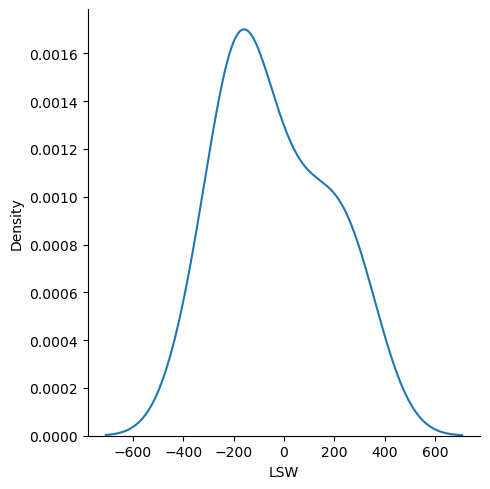

In [44]:
#Add constant and apply OLS
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)

#Results OLS
results = model.fit(cov_type="HC0")
print(results.summary())

#Residuals
residuals = y_test - y_pred
print(residuals)
sns.displot(residuals, kind='kde')